In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
# set the filepath and load
fp = 'District_Boundary/District_Boundary.shp'
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,DIST_NAME,STATE_NAME,POPULATION,AREA_SQ_KM,ID,geometry
0,JAISALMER,RAJASTHAN,508247,38487.17,1,"POLYGON ((157738.063 2935783.500, 157694.594 2..."
1,BARMER,RAJASTHAN,1964835,28550.95,2,"POLYGON ((157738.063 2935783.500, 157781.250 2..."
2,JALOR,RAJASTHAN,1448940,10647.40,3,"POLYGON ((277249.469 2855619.500, 277361.906 2..."
3,DUNGARPUR,RAJASTHAN,1107643,3770.78,4,"POLYGON ((359076.688 2650355.000, 359189.719 2..."
4,JHALAWAR,RAJASTHAN,1180323,6315.27,5,"POLYGON ((684142.750 2703277.750, 684144.062 2..."


<AxesSubplot:>

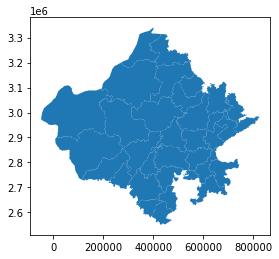

In [8]:
#plotting the map of the shape file preview of the maps without data in it
map_df.plot()

In [9]:
#opening the csv(.shp) file which contains the data to be plotted on the map
df = gpd.read_file('District_Boundary/District_Boundary.shp')
df.head()
#selecting the columns required
df = df[['DIST_NAME','POPULATION']]
#renaming the column name
data_for_map = df.rename(index=str, columns={'DIST_NAME': 'DISTRICT','POPULATION': 'POP'})

In [10]:
# check dat dataframe
data_for_map.head()

,DISTRICT,POP
0,JAISALMER,508247
1,BARMER,1964835
2,JALOR,1448940
3,DUNGARPUR,1107643
4,JHALAWAR,1180323


In [11]:
# joining the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('DIST_NAME').join(data_for_map.set_index('DISTRICT'))
#.head() returns the top 5(by default ) lines of the dataframe
merged.head()

,STATE_NAME,POPULATION,AREA_SQ_KM,ID,geometry,POP
DIST_NAME,,,,,,
JAISALMER,RAJASTHAN,508247,38487.17,1,"POLYGON ((157738.063 2935783.500, 157694.594 2...",508247
BARMER,RAJASTHAN,1964835,28550.95,2,"POLYGON ((157738.063 2935783.500, 157781.250 2...",1964835
JALOR,RAJASTHAN,1448940,10647.40,3,"POLYGON ((277249.469 2855619.500, 277361.906 2...",1448940
DUNGARPUR,RAJASTHAN,1107643,3770.78,4,"POLYGON ((359076.688 2650355.000, 359189.719 2...",1107643
JHALAWAR,RAJASTHAN,1180323,6315.27,5,"POLYGON ((684142.750 2703277.750, 684144.062 2...",1180323


<AxesSubplot:>

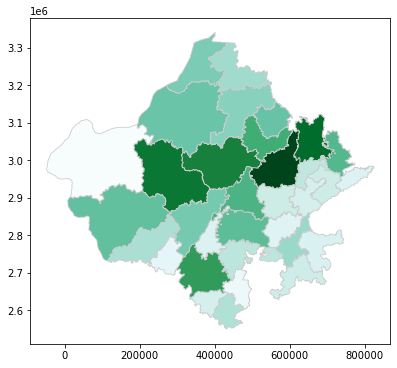

In [12]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'POP'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

In [13]:
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Population of Rajasthan', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

Text(0.1, 0.08, 'Source: Rajasthan Datastore, 2019')

In [14]:
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#saving our map as .png file.
fig.savefig('map_export.png', dpi=300)